In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/emotions/emotions-train.arff'
test_path = '../datasets/emotions/emotions-test.arff'
num_features = 72
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 202/202 [00:00<00:00, 3055.50it/s]

Train data shape:  (391, 1, 432)
Train labels shape:  (391, 6)
Test data shape:  (202, 1, 432)
Test labels shape:  (202, 6)


## DSLL Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (391, 1, 432)
Train Labels shape is  (391, 2)
Classes trained are: 0 to 2


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 5
Class 1, class 1 neurons = 5, class 0 neurons = 5


100%|██████████| 2000/2000 [2:28:02<00:00,  4.44s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.212871  |
| zero_one_loss       | 0.371287  |
| one_error           | 0.0544554 |
| micro av. jaccard   | 0.434211  |
| macro av. jaccard   | 0.434459  |
| micro av. precision | 0.628571  |
| macro av. precision | 0.629091  |
| micro av. recall    | 0.584071  |
| macro av. recall    | 0.586001  |
| micro av. f1        | 0.605505  |
| macro av. f1        | 0.605505  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.212871  |
| zero_one_loss       | 0.371287  |
| one_error           | 0.0544554 |
| micro av. jaccard   | 0.434211  |
| macro av. jaccard   | 0.434459  |
| micro av. precision | 0.628571  |
| macro av. pr

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 8, class 0 neurons = 9
Class 1, class 1 neurons = 8, class 0 neurons = 10
Class 2, class 1 neurons = 3, class 0 neurons = 7
Class 3, class 1 neurons = 3, class 0 neurons = 3


100%|██████████| 2000/2000 [5:28:03<00:00,  9.84s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.188119  |
| zero_one_loss       | 0.351485  |
| one_error           | 0.0247525 |
| micro av. jaccard   | 0.608247  |
| macro av. jaccard   | 0.634319  |
| micro av. precision | 0.751592  |
| macro av. precision | 0.767182  |
| micro av. recall    | 0.76129   |
| macro av. recall    | 0.777895  |
| micro av. f1        | 0.75641   |
| macro av. f1        | 0.7725    |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 4) (202, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.214109 |
| zero_one_loss       | 0.643564 |
| one_error           | 0        |
| micro av. jaccard   | 0.514045 |
| macro av. jaccard   | 0.518735 |
| micro av. precision | 0.675277 |
| macro av. precision 

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 12, class 0 neurons = 13
Class 1, class 1 neurons = 11, class 0 neurons = 13
Class 2, class 1 neurons = 6, class 0 neurons = 10
Class 3, class 1 neurons = 7, class 0 neurons = 8
Class 4, class 1 neurons = 5, class 0 neurons = 4
Class 5, class 1 neurons = 6, class 0 neurons = 4


100%|██████████| 2000/2000 [7:34:45<00:00, 13.64s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.20297  |
| zero_one_loss       | 0.366337 |
| one_error           | 0.039604 |
| micro av. jaccard   | 0.456954 |
| macro av. jaccard   | 0.458114 |
| micro av. precision | 0.775281 |
| macro av. precision | 0.787152 |
| micro av. recall    | 0.526718 |
| macro av. recall    | 0.536372 |
| micro av. f1        | 0.627273 |
| macro av. f1        | 0.627573 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 6) (202, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.207921 |
| zero_one_loss       | 0.727723 |
| one_error           | 0        |
| micro av. jaccard   | 0.502959 |
| macro av. jaccard   | 0.49806  |
| micro av. precision | 0.702479 |
| macro av. precision | 0.70992  |


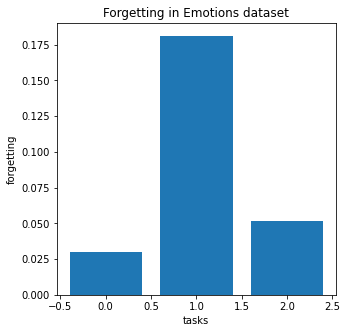

In [3]:
hparams_dict = {
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 200,
    'name': 'Emotions',
    'tasks': {'samples': None, 'labels': [2, 2, 2]},
    'seed': 2,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (391, 1, 432)
Train Labels shape is  (391, 2)
Classes trained are: 0 to 2


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 3
Class 1, class 1 neurons = 6, class 0 neurons = 4


100%|██████████| 2000/2000 [44:22<00:00,  1.33s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.128713  |
| zero_one_loss       | 0.252475  |
| one_error           | 0.0049505 |
| micro av. jaccard   | 0.636364  |
| macro av. jaccard   | 0.638258  |
| micro av. precision | 0.777778  |
| macro av. precision | 0.774927  |
| micro av. recall    | 0.777778  |
| macro av. recall    | 0.777031  |
| micro av. f1        | 0.777778  |
| macro av. f1        | 0.77547   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.128713  |
| zero_one_loss       | 0.252475  |
| one_error           | 0.0049505 |
| micro av. jaccard   | 0.636364  |
| macro av. jaccard   | 0.638258  |
| micro av. precision | 0.777778  |
| macro av. pr

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 7, class 0 neurons = 8
Class 1, class 1 neurons = 8, class 0 neurons = 7
Class 2, class 1 neurons = 5, class 0 neurons = 4
Class 3, class 1 neurons = 5, class 0 neurons = 5


100%|██████████| 2000/2000 [3:40:39<00:00,  6.62s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.25     |
| zero_one_loss       | 0.460396 |
| one_error           | 0.039604 |
| micro av. jaccard   | 0.36478  |
| macro av. jaccard   | 0.365111 |
| micro av. precision | 0.682353 |
| macro av. precision | 0.694816 |
| micro av. recall    | 0.439394 |
| macro av. recall    | 0.437892 |
| micro av. f1        | 0.534562 |
| macro av. f1        | 0.532738 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 4) (202, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.193069 |
| zero_one_loss       | 0.559406 |
| one_error           | 0        |
| micro av. jaccard   | 0.485149 |
| macro av. jaccard   | 0.490374 |
| micro av. precision | 0.731343 |
| macro av. precision | 0.730213 |


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 10, class 0 neurons = 13
Class 1, class 1 neurons = 10, class 0 neurons = 10
Class 2, class 1 neurons = 8, class 0 neurons = 9
Class 3, class 1 neurons = 8, class 0 neurons = 9
Class 4, class 1 neurons = 5, class 0 neurons = 5
Class 5, class 1 neurons = 3, class 0 neurons = 7


100%|██████████| 2000/2000 [4:10:18<00:00,  7.51s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.240099  |
| zero_one_loss       | 0.420792  |
| one_error           | 0.0594059 |
| micro av. jaccard   | 0.510101  |
| macro av. jaccard   | 0.499891  |
| micro av. precision | 0.677852  |
| macro av. precision | 0.667446  |
| micro av. recall    | 0.673333  |
| macro av. recall    | 0.663773  |
| micro av. f1        | 0.675585  |
| macro av. f1        | 0.6656    |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 6) (202, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.215347 |
| zero_one_loss       | 0.732673 |
| one_error           | 0        |
| micro av. jaccard   | 0.479042 |
| macro av. jaccard   | 0.476817 |
| micro av. precision | 0.701754 |
| macro av. precision 

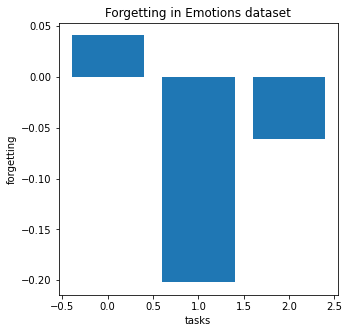

In [4]:
hparams_dict = {
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 200,
    'name': 'Emotions',
    'tasks': {'samples': None, 'labels': [2, 2, 2]},
    'seed': 3,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (391, 1, 432)
Train Labels shape is  (391, 2)
Classes trained are: 0 to 2


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 4
Class 1, class 1 neurons = 6, class 0 neurons = 4


100%|██████████| 2000/2000 [43:53<00:00,  1.32s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.195545  |
| zero_one_loss       | 0.346535  |
| one_error           | 0.0445545 |
| micro av. jaccard   | 0.48366   |
| macro av. jaccard   | 0.484872  |
| micro av. precision | 0.770833  |
| macro av. precision | 0.787659  |
| micro av. recall    | 0.564885  |
| macro av. recall    | 0.579476  |
| micro av. f1        | 0.651982  |
| macro av. f1        | 0.650746  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.195545  |
| zero_one_loss       | 0.346535  |
| one_error           | 0.0445545 |
| micro av. jaccard   | 0.48366   |
| macro av. jaccard   | 0.484872  |
| micro av. precision | 0.770833  |
| macro av. pr

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 8, class 0 neurons = 9
Class 1, class 1 neurons = 8, class 0 neurons = 7
Class 2, class 1 neurons = 3, class 0 neurons = 3
Class 3, class 1 neurons = 5, class 0 neurons = 5


100%|██████████| 2000/2000 [1:31:31<00:00,  2.75s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.163366  |
| zero_one_loss       | 0.321782  |
| one_error           | 0.0049505 |
| micro av. jaccard   | 0.547945  |
| macro av. jaccard   | 0.558069  |
| micro av. precision | 0.707965  |
| macro av. precision | 0.706767  |
| micro av. recall    | 0.707965  |
| macro av. recall    | 0.703076  |
| micro av. f1        | 0.707965  |
| macro av. f1        | 0.704702  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 4) (202, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.181931 |
| zero_one_loss       | 0.539604 |
| one_error           | 0        |
| micro av. jaccard   | 0.505051 |
| macro av. jaccard   | 0.51363  |
| micro av. precision | 0.738916 |
| macro av. precision 

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 11, class 0 neurons = 13
Class 1, class 1 neurons = 11, class 0 neurons = 10
Class 2, class 1 neurons = 7, class 0 neurons = 8
Class 3, class 1 neurons = 7, class 0 neurons = 9
Class 4, class 1 neurons = 5, class 0 neurons = 5
Class 5, class 1 neurons = 3, class 0 neurons = 7


100%|██████████| 2000/2000 [2:37:47<00:00,  4.73s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.269802  |
| zero_one_loss       | 0.470297  |
| one_error           | 0.0693069 |
| micro av. jaccard   | 0.475962  |
| macro av. jaccard   | 0.460771  |
| micro av. precision | 0.651316  |
| macro av. precision | 0.634673  |
| micro av. recall    | 0.63871   |
| macro av. recall    | 0.620145  |
| micro av. f1        | 0.644951  |
| macro av. f1        | 0.627219  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 6) (202, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.210396 |
| zero_one_loss       | 0.70297  |
| one_error           | 0        |
| micro av. jaccard   | 0.498031 |
| macro av. jaccard   | 0.49998  |
| micro av. precision | 0.698895 |
| macro av. precision 

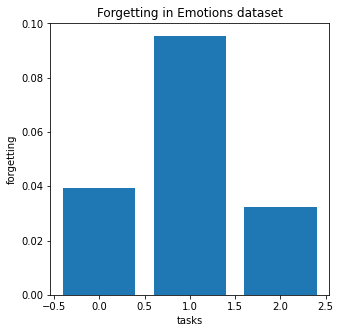

In [5]:
hparams_dict = {
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 200,
    'name': 'Emotions',
    'tasks': {'samples': None, 'labels': [2, 2, 2]},
    'seed': 4,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)